<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [30]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [31]:
menor_preco = data['price'].min()
maior_preco = data['price'].max()

print(f'O dimante mais barato tem o valor de: {menor_preco}.\nO mais caro custa: {maior_preco}.')

O dimante mais barato tem o valor de: 326.
O mais caro custa: 18823.


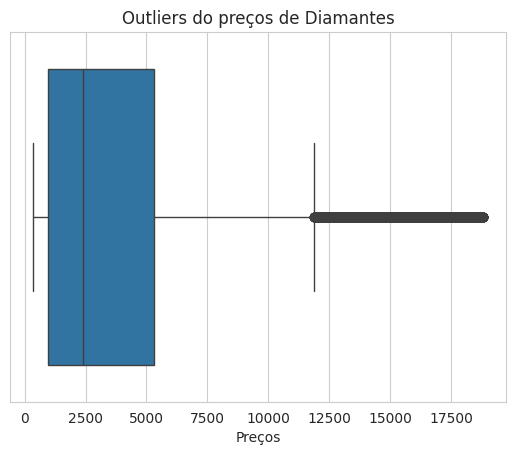

In [32]:
#Criando o gráfico para verificar os outliers

with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=data["price"])
  grafico.set(title='Outliers do preços de Diamantes', xlabel='Preços')


**Insight do gráfico 1**: Ao verificarmos o gráfico percebemos que a concentração dos preços dos diamantes está mais ou menos entre 1500 a 5100 eu diria, o menor Outliers tem o preço de 326, o maior tem o valor de 18823.

---

## 2\. Correlação entre o preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [33]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
# criando uma variável para selecionar os dados que serão utilizados
diamonds = data[['carat', 'clarity', 'price']]

#verificando os dados
display(diamonds)


,carat,clarity,price
0,0.23,SI2,326
1,0.21,SI1,326
2,0.23,VS1,327
3,0.29,VS2,334
4,0.31,SI2,335
...,...,...,...
53935,0.72,SI1,2757
53936,0.72,SI1,2757
53937,0.70,SI1,2757
53938,0.86,SI2,2757


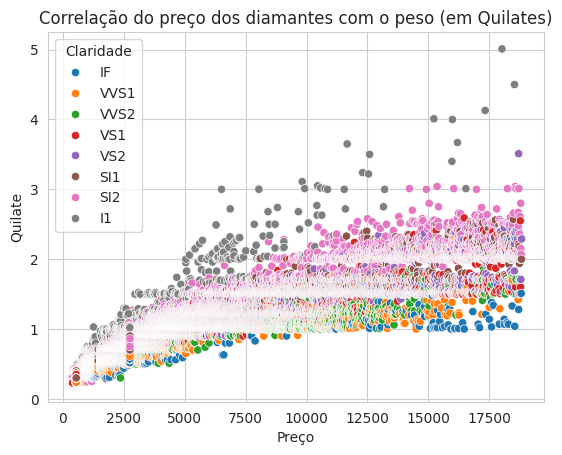

In [35]:
#criando o gráfico de dispersão

#essa linha ativa as grades do gráfico
with sns.axes_style('whitegrid'):

  #gerando o gráfico
  grafico = sns.scatterplot(data=diamonds, x='price', y='carat', hue='clarity', palette='tab10')

  #personalizando o gráfico

  grafico.set(title='Correlação do preço dos diamantes com o peso (em Quilates)', xlabel='Preço', ylabel='Quilate');
  grafico.get_legend().set_title("Claridade");


**Insight do gráfico 2**: Ao analisarmos o gráfico percebemos que o peso da maioria dos diamantes dessa base estão entre os quilates 1 e 2. Outro ponto importante é que a maioria dos diamantes estão na claridade SI2(representado pela cor rosa), o diamante mais pesado e portanto um outlier, tem mais de 5 quilates de peso e está precificado em mais de 17500, a claridade dele é I1. Quanto maior a claridade, mais caro é o quilate do diamante.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [36]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [39]:
# gráfico do exercício 3

cars = data[['weight', 'model_year']]
cars.head()

,weight,model_year
0,3504,70
1,3693,70
2,3436,70
3,3433,70
4,3449,70


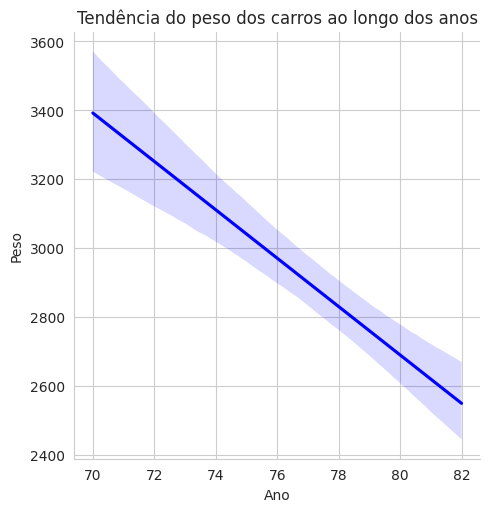

In [50]:
with sns.axes_style('whitegrid'):
    # Plotando o gráfico
    grafico = sns.lmplot(x="model_year", y="weight", data=cars, scatter=False, line_kws={'color': 'blue'})

    # Personalizando o gráfico
    grafico.set(title='Tendência do peso dos carros ao longo dos anos')
    grafico.set_axis_labels(x_var='Ano', y_var='Peso')


**Insight do gráfico 3**: Perce-se que houve uma clara tendência de queda no que diz respeito ao peso dos carros ao dos anos analisados (1970 até 1982).

---